<a href="https://colab.research.google.com/github/Asuna-sama-1/NLP_hotel_review/blob/main/Hotel__Review_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hotel Reviews Key Phrases Extraction Report
Data 245 Machine Learning  
Team 8: Asuna Ding, Huang Peng, Meng Yuan, Rui Xu


**Data**: https://www.kaggle.com/andrewmvd/trip-advisor-hotel-reviews.    

**Slides**: https://docs.google.com/presentation/d/1KDihObCkzQlIrT6XhkQpRi67Gbi_O-DxNs_TBj_M3fo/edit?usp=sharing. 

**Agenda**


1. (motivation) motivation,what is the problem 
 
  (motivation) how to approch this problem
3. (data exploration) data characteristics, and how to process data
4. (approaches) solution implementation, what ML methods adopted
5. solution evaluation
6. (conclution) impact after resolving proposed problem
6. Future work



## 1. Motivation

The internet is a main source of choosing travel services in the world and has made a remarkable difference in the process of spreading information about tourism. Majority of people are likely to conduct online researches before they make any purchase, such as hotel booking in our case. Guest reviews are becoming a prominent factor affecting people’s decision making on purchase; people tend to take other consumers’ perspective into consideration for their purchases, which makes Nature Language Processing very important. As the largest travel website in the world, TripAdvisor.com consist of user-generated data that provides considerable amount of useful information that can help businesses to keep track and to manage customer opinions.   
In this project, we will take hotel text reviews from TripAdvisor.com and propose unsupervised machine learning approaches to extract key phrase in order to solve hotel review analysis problem. 


## 2. Data Exploration


1. Data source, feature type
1. Statistical description
2. Data distribution
3. Data quality issue
4. Visualization of pair of features


### 2.1 Data source

Our dataset is from kaggle (https://www.kaggle.com/andrewmvd/trip-advisor-hotel-reviews
). 
The dataset contains 20,491 instances with no missing value.We have 2 features which are Review and Rating. Rating is a categorical feature which indicate the rate of hotel given by users, and there are 5 different levels: 1, 2, 3, 4, 5. 

Import common libraries.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import collections

Upload csv file

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving tripadvisor_hotel_reviews.csv to tripadvisor_hotel_reviews.csv


In [ ]:
reviews = pd.read_csv('tripadvisor_hotel_reviews.csv')
reviews.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


### 2.2 Statistical description


In [ ]:
# check missing value
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [ ]:
# Rating statistic description
reviews.Rating.describe()

count    20491.000000
mean         3.952223
std          1.233030
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

As the statistic description of Rating shows:
The average ( or mean) is 3.95. The Median is 4. The inter-quartile range is 3 - 5 and the standard deviation is 1.23.


In [ ]:
# Review statistic description
reviews.Review.describe()

count                                                 20491
unique                                                20491
top       wonderful getaway husband couple 2 year old da...
freq                                                      1
Name: Review, dtype: object

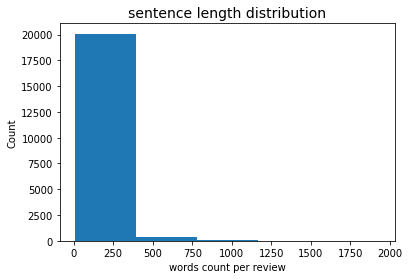

Longest sentence:  1933  words.
Shortest sentence:  9  words.


In [ ]:
length_dist = [len(x.split(" ")) for x in reviews['Review']]
# print(length_dist)
plt.hist(length_dist,bins=5)
plt.xlabel('words count per review')
plt.ylabel('Count')
plt.title('sentence length distribution', fontsize=14)
plt.show()

print('Longest sentence: ', max(length_dist)," words.")
print('Shortest sentence: ', min(length_dist)," words.")

As the statistic description of Review shows: there are 20491 instances in the dataset with no missing value and no duplicated value. The men length of reviews is 104 words, and we can see over 90% of reviews are bwteen 9 to 380 words. The longest review contain 1933 words, and the shortest review is 9 words.

In [ ]:
# Check reviews randomly
reviews.iloc[1342]['Review']

'great resort area hotle price, 1. hotel not beach, prices reflect, want beach large balcony resort style pool not stay here.2, breakfast included room price excellent, early, lines start right 8 a.m.3, safe secure immaculately clean hotel small rooms, coin laundry 8th floor.4, want space ask 8th floor mountain view rooms rooms hotel lanai, lanai huge no real view parking garage, great spot drink friends dinner.5, public access beach right street,  '

In [ ]:
# Check reviews randomly
reviews.iloc[10000]['Review']

'recommanded date 1 st december 2006we just returned splendid stay hotel nights thing realy pleasant.very clean place nice staff.breakfast relatively expensive recommand outside hotel.two little problemes hotel bit far metro station no free connection internet,  '

In [ ]:
# Check reviews randomly
reviews.iloc[20000]['Review']

"best hotel remember, booked hotel internet just going pictures reviews read site, glad did, hotel lovely modern tasteful excellently equipt clean, location n't perfect sites barcelona gaudi buildings museums shops bars resaurants catalyuna square litterally corner bus metro services bring ride away changes bus metro-line, extremely easy need holiday hotel staff helpful request needed emergency dental treatment receptionist boss got dentist straight away, impressive service excellent customer care.i not recommend hotel highly, schools door effects little, not issue hotel wonderful,  "

### 2.3 Data distribution

#### 2.3.1 Rating data distribution

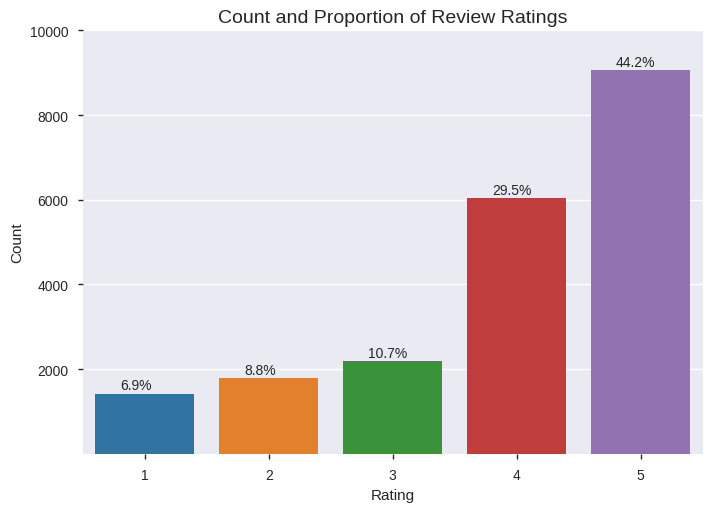

In [ ]:
# Rating data distribution

ax=sns.countplot(x = reviews.Rating)
plt.yticks([2000, 4000, 6000, 8000, 10000])
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count and Proportion of Review Ratings', fontsize=14)

total = float(len(reviews.Rating)) 
# x,y = reviews.Rating.value_counts()
for i,n in enumerate(reviews.Rating.value_counts(ascending = True)):
  # print(i,n)
  percentage = '{:.1f}%'.format(n/total*100)
  i = i - 0.2
  n = n + 100
  ax.annotate(percentage,xy=(i,n))

plt.show()

The data is follow exponential distribution. As most of the people tend to give relatively good rate to hotels, but there are usually a small number of hotels got very low rate. To be specificly, 5 is the most common(44.2%) rate given by users,and the second most common rate is 4, which contributes 29.5% of the all the ratings.  

#### 2.3.2 Review data distribution: Sentence length distribution

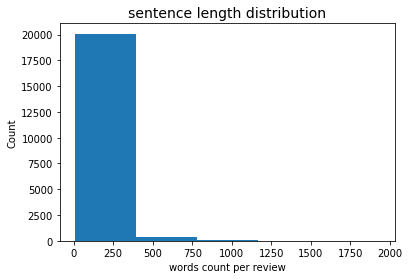

Longest sentence:  1933  words.
Shortest sentence:  9  words.


In [ ]:
length_dist = [len(x.split(" ")) for x in reviews['Review']]
# print(length_dist)
plt.hist(length_dist,bins=5)
plt.xlabel('words count per review')
plt.ylabel('Count')
plt.title('sentence length distribution', fontsize=14)
plt.show()

print('Longest sentence: ', max(length_dist)," words.")
print('Shortest sentence: ', min(length_dist)," words.")

In all the reviews in our dataset, we can see over 90% of reviews are bwteen 9 to 380 words. The longest review contain 1933 words, and the shortest review is 9 words. 

#### 2.3.3 Review data distribution: Most common words

In [ ]:
# lower words
review_all = reviews["Review"]
review_all_lower = [review.lower().split() for review in review_all]

total unique words in original reviews:  102008  words.


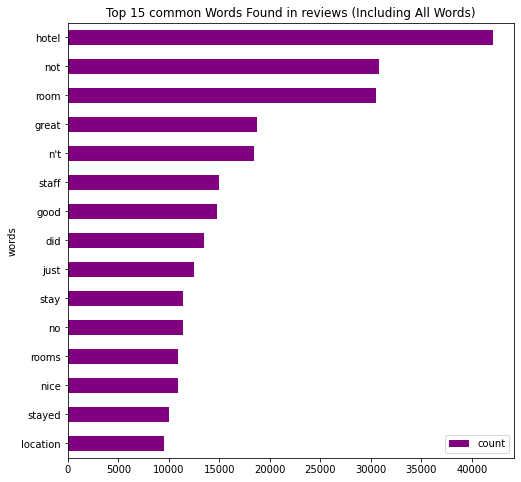

In [ ]:
from itertools import chain

# add all reviews to a list
review_all_lower_list = list(chain(*review_all_lower))
print('total unique words in original reviews: ', len(np.unique(np.array(review_all_lower_list)))," words.")

# most common words in original reviews
counts_review_list = collections.Counter(review_all_lower_list)
df_counts_review_list = pd.DataFrame(counts_review_list.most_common(15),
                             columns=['words', 'count'])


# visualize most common words in original reviews
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
df_counts_review_list.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Top 15 common Words Found in reviews (Including All Words)")

plt.show()

original reviews

words needed clean: 

1.stop words

2.mannualy build collection of words don't tell us so much (too common words, irregular words, and rare words) like: hotel, n't...

3.punctuation

#### 2.3.4 Review data distribution: Wordcloud

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

def wordCloud_generator(data, title=None):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='black',
                          min_font_size = 10
                         ).generate(" ".join(data.values))
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=30)
    plt.show() 

In [ ]:
data = pd.read_csv('tripadvisor_hotel_reviews.csv')
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


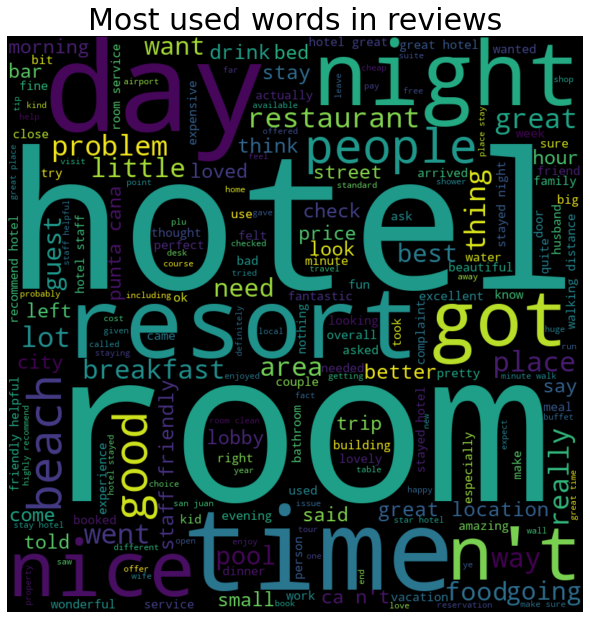

In [ ]:
wordCloud_generator(data['Review'], title="Most used words in reviews")

Before data processing, the most frequent words in reviews are hotel, room, time, resort...


### 2.4 Data quality issue

**Review - Data quality issue**

As we can see from the "Most common word in the original Reviews (2.3.3)",for review, we have some common problems of natural language processing, such as stop words (e.g.not, did, just, no etc.), irregular words (n't etc.), and some too common words which do not tell many information. In order to cope these issues, we used the NLTK library for stopwords cleaning, lemmatization,and tokenization,and we also applied manual cleaning to build collections for words don’t tell us too much. The detail will be introduced in detail in the "Approach" part later. 


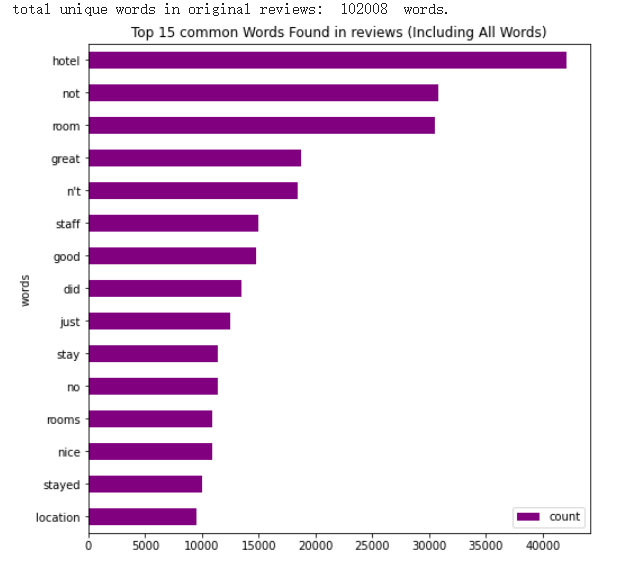


**Rating - Data quality issue**

As we can see from the Rating data distribution (2.3.1), the distribution of rating follows an exponential distribution. In order to dealing with the unbalanced sample, we applied oversampling and used feature engineering libraries to dealing with these problems. 

After applying over sampling, we have 45270 reviews and ratings, 9045 for each rating.

In [ ]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(reviews, reviews.Rating)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
ax=sns.countplot(x = y)
plt.yticks([2000, 4000, 6000, 8000, 10000])
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count and Proportion of Review Ratings (Over Sampling)', fontsize=14)

total = float(len(X_resampled.Rating)) 
# x,y = reviews.Rating.value_counts()
for i,n in enumerate(X_resampled.Rating.value_counts(ascending = True)):
  # print(i,n)
  percentage = '{:.1f}%'.format(n/total*100)
  i = i - 0.2
  n = n + 100
  ax.annotate(percentage,xy=(i,n))

plt.show()

## 3. Approaches

Different approaches may need different data processes, so these processes are contained in their approaches. 

#### Try 1: nltk
**Why choose NLTK?**  
Natural Language Toolkit (NLTK) is one of the most comprehensive and famous Python NLP libraries. It has some functionalities like: tokenization, POS, NER, classification, sentiment analysis, access to corpora, etc.  
**Pros**  


*   Full NLP library with many 3rd extensions
*   Supports the largest number of languages compared to other libraries

**Cons**  


*   Slow
*   Only splits text by sentences, without analyzing the semantic structure
*   No neural network models

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# tokenize sentences to words
reviews['Words'] = reviews['Review'].apply(word_tokenize)

# remove stop words
stop_words = set(stopwords.words('english'))

def clean_words(x):
    words = []
    for i in x:
      # print(type(i))
      if i.isalnum() and i not in stopwords.words('english'):
          words.append(i)
    return words

reviews['Words'] = reviews['Words'].apply(clean_words)

# get the most common words
common_words_by_ratings = pd.DataFrame()
ratings = sorted(reviews.Rating.unique())
for i in ratings:
  words_list = []
  for single_words in reviews[reviews['Rating'] == i]['Words']:
    words_list.extend(single_words)
  common_words_by_ratings[i] = collections.Counter(words_list).most_common(20)

In [ ]:
# display the most common words by ratings
common_words_by_ratings

,1,2,3,4,5
0,"(hotel, 3588)","(room, 4250)","(hotel, 5058)","(hotel, 14125)","(hotel, 21822)"
1,"(room, 3267)","(hotel, 4166)","(room, 4424)","(room, 10172)","(room, 12126)"
2,"(stay, 1207)","(good, 1484)","(good, 2453)","(great, 7414)","(great, 10665)"
3,"(staff, 958)","(stay, 1367)","(great, 1751)","(good, 6697)","(staff, 7808)"
4,"(rooms, 893)","(rooms, 1354)","(nice, 1739)","(nice, 4826)","(stay, 6823)"
5,"(night, 874)","(staff, 1283)","(rooms, 1480)","(staff, 4665)","(good, 5705)"
6,"(service, 810)","(service, 1217)","(staff, 1468)","(stay, 4331)","(stayed, 4817)"
7,"(day, 807)","(night, 1141)","(stay, 1409)","(location, 3865)","(location, 4807)"
8,"(like, 713)","(food, 1075)","(location, 1402)","(rooms, 3615)","(rooms, 4652)"
9,"(told, 707)","(day, 1059)","(beach, 1260)","(clean, 3452)","(nice, 4407)"


**Conclusions:**  
The NLTK can remove stop words easily. The reason we don't remove special characters like puctuations here is that they have been automatically removed by the 'word_tokenize' function.  

The result is not good.   
1. There're too many useless common words like 'hotel', 'room', their weights seem too high.
2. Single word can't convey too much details. For example, with a single word 'service' we can't tell the service of a hotel is good or not.


#### Try2: improve nltk.  
According to the first try, we could not only get the most common words. Given the structure of the English language, useful information in a hotel review is more likely to hide in the noun and the adjective that modify it. So get the most common adjectives, nouns, and bi-grams makes more sense here.

In [ ]:
# add word post tags
reviews['POS'] = reviews['Words'].apply(nltk.pos_tag)

In [ ]:
def get_adjective(x):
    adj = ['JJ', 'JJR', 'JJS']
    word = []
    for i in x:
        if i[1] in adj:
            word.append(i[0])
    return word

# get all adjectives
reviews['Adj'] = reviews['POS'].apply(get_adjective)

# get the most common adjectives
common_adjectives_by_ratings = pd.DataFrame()
for i in ratings:
  words_list = []
  for single_adjectives in reviews[reviews['Rating'] == i]['Adj']:
    words_list.extend(single_adjectives)
  common_adjectives_by_ratings[i] = collections.Counter(words_list).most_common(20)

In [ ]:
# display the most common adjectives
common_adjectives_by_ratings

,1,2,3,4,5
0,"(good, 602)","(good, 1473)","(good, 2436)","(great, 7414)","(great, 10665)"
1,"(bad, 435)","(nice, 954)","(great, 1751)","(good, 6670)","(good, 5670)"
2,"(small, 363)","(great, 908)","(nice, 1601)","(nice, 4479)","(nice, 4085)"
3,"(nice, 329)","(small, 628)","(clean, 957)","(clean, 2870)","(excellent, 3209)"
4,"(great, 319)","(clean, 519)","(small, 944)","(small, 2349)","(clean, 3195)"
5,"(old, 303)","(bad, 502)","(little, 741)","(little, 2074)","(best, 2586)"
6,"(worst, 284)","(little, 472)","(bad, 523)","(comfortable, 1611)","(wonderful, 2583)"
7,"(terrible, 256)","(old, 359)","(free, 421)","(helpful, 1591)","(helpful, 2478)"
8,"(clean, 236)","(beautiful, 351)","(best, 394)","(excellent, 1472)","(little, 2261)"
9,"(new, 235)","(best, 335)","(old, 387)","(free, 1328)","(small, 2233)"


In [ ]:
def get_nouns(x):
    noun = ['NN', 'NNS', 'NNP', 'NNPS']
    word = []
    for i in x:
        if i[1] in noun:
            word.append(i[0])
    return word

# get all nouns
reviews['Noun'] = reviews['POS'].apply(get_nouns)

# get the most common nouns 
common_nouns_by_ratings = pd.DataFrame()
for i in ratings:
  words_list = []
  for single_nouns in reviews[reviews['Rating'] == i]['Noun']:
    words_list.extend(single_nouns)
  common_nouns_by_ratings[i] = collections.Counter(words_list).most_common(20)

In [ ]:
# display the most common nouns
common_nouns_by_ratings

,1,2,3,4,5
0,"(hotel, 3436)","(room, 4250)","(hotel, 4845)","(hotel, 13542)","(hotel, 20949)"
1,"(room, 3267)","(hotel, 3979)","(room, 4424)","(room, 10172)","(room, 12126)"
2,"(staff, 958)","(rooms, 1354)","(rooms, 1480)","(staff, 4665)","(staff, 7808)"
3,"(rooms, 893)","(staff, 1283)","(staff, 1468)","(location, 3751)","(location, 4662)"
4,"(night, 874)","(service, 1206)","(location, 1344)","(rooms, 3615)","(rooms, 4652)"
5,"(day, 807)","(night, 1141)","(night, 1219)","(time, 2999)","(service, 4081)"
6,"(service, 801)","(food, 1075)","(food, 1159)","(food, 2886)","(time, 3958)"
7,"(time, 686)","(day, 1059)","(time, 1113)","(night, 2829)","(day, 3586)"
8,"(stay, 614)","(time, 1044)","(service, 1081)","(day, 2789)","(breakfast, 3551)"
9,"(food, 608)","(resort, 880)","(day, 1080)","(beach, 2632)","(stay, 3446)"


In [ ]:
# get the most common bi-grams
common_bigrams_by_ratings = pd.DataFrame()

for i in ratings:
  words_list = []
  for single_words in reviews[reviews['Rating'] == i]['Words']:
    words_list.extend(single_words)
  bigram = list(nltk.bigrams(words_list))
  common_bigrams_by_ratings[i] = collections.Counter(bigram).most_common(20)

In [ ]:
# display the most common bi-grams
common_bigrams_by_ratings

,1,2,3,4,5
0,"((punta, cana), 150)","((punta, cana), 198)","((great, location), 248)","((great, location), 808)","((staff, friendly), 968)"
1,"((credit, card), 110)","((room, service), 140)","((staff, friendly), 235)","((staff, friendly), 726)","((great, location), 957)"
2,"((customer, service), 103)","((staff, friendly), 124)","((punta, cana), 201)","((hotel, great), 557)","((great, hotel), 934)"
3,"((stay, hotel), 101)","((star, hotel), 121)","((good, location), 166)","((punta, cana), 548)","((hotel, great), 866)"
4,"((star, hotel), 95)","((air, conditioning), 120)","((room, clean), 136)","((walking, distance), 512)","((recommend, hotel), 818)"
5,"((5, star), 88)","((5, star), 116)","((room, service), 132)","((friendly, helpful), 464)","((friendly, helpful), 735)"
6,"((hotel, staff), 85)","((stay, hotel), 102)","((walking, distance), 131)","((great, hotel), 450)","((highly, recommend), 727)"
7,"((room, service), 83)","((san, juan), 97)","((hotel, great), 130)","((good, value), 405)","((walking, distance), 704)"
8,"((worst, hotel), 82)","((great, location), 96)","((san, juan), 125)","((nice, hotel), 400)","((hotel, staff), 618)"
9,"((stay, away), 75)","((stayed, hotel), 90)","((stayed, hotel), 124)","((room, clean), 396)","((punta, cana), 582)"


**Conclusions:**  
When the task becomes more complex like add tags to words, the NLTK performs slower. 

The result is not good but do give more information compared with the first try. 
1. There're still some useless common words like 'punta cana' which is a place name.
2. A single adjectics like 'horrible' and a single noun like 'service' don't give meaningful information seperately, but if we can conbine them together, we may get some useful phrases.  
3. This way can't combine n-grams together, for example, 'nice location' and 'beautiful window view' can't appear at the same time.


#### Try 3: gensim keywords
**Why choose gensim?**  
Gensim ("Generate Similar") is a popular NLP library used for unsupervised topic modeling. It uses top academic models and modern statistical machine learning like Word2vec and fastText to perform various complex tasks such as: building document or word vectors; performing topic identification; performing document comparison (retrieving semantically similar documents); analysing plain-text documents for semantic structure, and so on.  
**Pros**  


*  The facilities provided by Gensim for building topic models and word embedding is unparalleled.
*  Let us handle large text files even without loading the whole file in memory.
*  Doesn’t require costly annotations or hand tagging of documents because it uses unsupervised models.

The process of **keyword extraction** is listed below:
1. The text is tokenized first, and annotated with part of speech tags — a preprocessing step required to enable the application of syntactic filters.
2. All lexical units that pass the syntactic filter are added to the graph, and an edge is added between those lexical units that co-occur within a window of words.
3. After the graph is constructed (undirected unweighted graph), the score associated with each vertex is set to an initial value of 1, and the ranking algorithm described in section 2 is run on the graph for several iterations until it converges — usually for 20–30 iterations, at a threshold of 0.0001.  
The score is claculated by the following formula: 
![avatar](https://miro.medium.com/max/700/1*hSqU9lBzoB_BpiNZk5_YEA.png)
4. Once a final score is obtained for each vertex in the graph, vertices are sorted in reversed order of their score, and the top vertices in the ranking are retained for post-processing.
5. During post-processing, all lexical units selected as potential keywords by the TextRank algorithm are marked in the text, and sequences of adjacent keywords are collapsed into a multi-word keyword.

In gensim, the function "keywords" does the above process for us. 


In [ ]:
from gensim.summarization import keywords

def extract_features(star):
  features = []
  for review in reviews[reviews['Rating'] == star]['Review']:
    features.extend(str.split(keywords(review, words=5, lemmatize=True)))
  return collections.Counter(features)

keywords_by_ratings = pd.DataFrame()

for i in ratings:
  keywords_by_ratings[i] = extract_features(i).most_common(20)

In [ ]:
# display keywords by rankings
keywords_by_ratings

,1,2,3,4,5
0,"(hotel, 567)","(room, 680)","(hotel, 878)","(hotel, 2552)","(hotel, 4142)"
1,"(room, 507)","(hotel, 662)","(room, 729)","(room, 1866)","(room, 2332)"
2,"(rooms, 219)","(rooms, 302)","(rooms, 373)","(great, 1039)","(great, 1734)"
3,"(hotels, 174)","(hotels, 201)","(good, 296)","(good, 924)","(stay, 1427)"
4,"(stay, 161)","(stay, 198)","(stay, 228)","(stay, 826)","(hotels, 997)"
5,"(staff, 107)","(night, 148)","(hotels, 219)","(rooms, 724)","(rooms, 912)"
6,"(night, 100)","(good, 128)","(nice, 195)","(nice, 617)","(staff, 837)"
7,"(service, 86)","(service, 121)","(great, 185)","(hotels, 606)","(good, 684)"
8,"(place, 84)","(resort, 110)","(location, 172)","(location, 482)","(stayed, 573)"
9,"(day, 71)","(staff, 103)","(beach, 140)","(staff, 451)","(location, 519)"


**Conclusions:**  
The result is not good as we expect to.
1. We tried to combine the reviews together and then extract keywords from them, but the Colab crashed. So we extract keywords from ecah reviews and then combine them together.
2. A phrase we need may be "terrible service", but it may not be in high rank in this keywords extraction algorithm. We need to define a new rule to filter these phrases and may also need to remove some words like "hotel".


#### Try 4: spaCy 
**Why choose spaCy?**  
As an advanced NLP library, spaCy is geared toward performance and operating together with deep learning frameworks such as TensorFlow or PyTorch. It comes with pre-trained statistical models and word vectors. It features tokenization for 50+ languages, convolutional neural network models for tagging, parsing and named entity recognition. It has some functionalities like: tokenization, POS, NER, classification, sentiment analysis, dependency parsing, word vectors, etc.  
**Pros**  


*   Fast.
*   Use neural networks for training models.

The process of this approach is: review corpus -> syntactic dependencies analysis -> filter by pattern -> drop meaningless words -> gathering -> sentiment analysis -> ranking

In [ ]:
# download the pre-trained model
# please restart runtime after download the model
!python -m spacy download en_core_web_md

     |████████████████████████████████| 96.4MB 81.1MB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.2.5-cp36-none-any.whl size=98051305 sha256=0d1afdf25be28f1759ef0303370fcb182cd1ab14066f777678b95b2c1a4b38d4
  Stored in directory: /tmp/pip-ephem-wheel-cache-o0kdie__/wheels/df/94/ad/f5cf59224cea6b5686ac4fd1ad19c8a07bc026e13c36502d81
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [ ]:
import spacy
from spacy.matcher import Matcher
from spacy.tokens import Span
from spacy import displacy

nlp = spacy.load('en_core_web_md')

In [ ]:
# check the syntactic dependencies and named entitied for the first review
doc = nlp(reviews['Review'][0])
displacy.render(doc, style='dep', jupyter=True, options={'compact':True})
displacy.render(doc, style='ent', jupyter=True)

After syntactic dependencies analysis, one important thing is to filter the target phrases. There're several ways to do this in spaCy, after comparing their functions, we choose token based matching way because we can make use of the dependencies in this way. We also try different patterns for the tokem based matching, then finally find the one we need and add it to the pipeline. 


In [ ]:
# filter by chunks try 1
# doc1 has been deleted
# for chunk in doc1.noun_chunks:
#   if chunk.root.dep_ == 'nsubj':
#     print(f'{chunk.text:{30}} {chunk.root.text:{15}} {chunk.root.dep_:{8}} {chunk.root.head.text:{10}} {chunk.lemma_}')

nice hotel expensive parking   parking         nsubj    got        nice hotel expensive parking
good deal                      deal            nsubj    stay       good deal


In [ ]:
# filter by chunks try 2
# sentences has been deleted
# for chunk in nlp(sentences[1]).noun_chunks:
#   if chunk.root.dep_ == 'nsubj':
#     print(f'{chunk.text:{40}} {chunk.root.text:{15}} {chunk.root.dep_:{8}} {chunk.root.head.text:{10}} {chunk.lemma_}')

previous reviews                         reviews         nsubj    did        previous review
little disappointed non-existent view room room room            nsubj    clean      little disappointed non - existent view room room
bed                                      bed             nsubj    woke       bed


In [ ]:
# filter by chunks try 3
# for chunk in doc.noun_chunks:
#   if chunk.root.dep_ == 'nsubj':
#     print(f'{chunk.text:{30}} {chunk.root.text:{15}} {chunk.root.dep_:{8}} {chunk.root.head.text:{10}} {chunk.lemma_}')

nice hotel expensive parking   parking         nsubj    got        nice hotel expensive parking
good deal                      deal            nsubj    stay       good deal
little disappointed non-existent view room room room            nsubj    clean      little disappointed non - existent view room room
bed                            bed             nsubj    woke       bed
loud bangs doors               doors           nsubj    hear       loud bang door
people                         people          nsubj    talking    people
overall nice experience        experience      nsubj    pay        overall nice experience


In [ ]:
# filter by pattern try 1
# pattern = [{'POS': 'ADJ', 'DEP': 'amod', 'TAG': ''},
#            {'POS': 'NOUN', 'DEP': 'nsubj'},
#            {'POS': 'NOUN', 'DEP': 'compound', 'OP': '?'}]


# filter by pattern try 2
# matcher = Matcher(nlp.vocab)
# pattern = [{'POS': 'ADJ', 'DEP': 'amod'},
#            {'POS': 'NOUN'},
#            {'POS': 'NOUN', 'DEP': 'compound', 'OP': '?'}]
# matcher.add("valid_comments", None, pattern)

# doc2 = nlp(reviews['Review'][0])
# matches = matcher(doc2)

# phrases = []
# for match_id, start, end in matches:
#     string_id = nlp.vocab.strings[match_id]  # Get string representation
#     span = doc2[start:end]  # The matched span
#     phrases.append(span.text)
#     print(f'{match_id} {start:{3}} {end:{3}} {span.text}')

16519067074806155580   0   2 nice hotel
16519067074806155580   2   4 expensive parking
16519067074806155580   5   7 good deal
16519067074806155580  12  14 late evening
16519067074806155580  16  18 previous reviews
16519067074806155580  30  32 existent view
16519067074806155580  30  33 existent view room
16519067074806155580  35  37 nice size
16519067074806155580  41  43 stiff neck
16519067074806155580  43  45 high pillows
16519067074806155580  54  56 loud bangs
16519067074806155580  66  68 noisy neighbors
16519067074806155580  78  80 nice touch
16519067074806155580  86  88 great walking
16519067074806155580  86  89 great walking distance
16519067074806155580  92  94 nice experience


In [ ]:
# add stop_words
# we find these words manually
usless_entities = ['location', 'hotel', 'experience', 'morning', 'noon', 'afternoon', 'evening', 'night', 'time', 'thing']

# modify pipeline
def get_valid_comments(doc):
  matcher = Matcher(nlp.vocab)
  # filter by patterns
  pattern = [{'LOWER': 'no', 'OP': '?'}, 
             {'LOWER': 'not', 'OP': '?'},
             {'POS': 'ADJ', 'DEP': 'amod'},
             {'POS': 'NOUN'},
             {'POS': 'NOUN', 'DEP': 'compound', 'OP': '?'}]
  matcher.add("valid_comments", None, pattern)
  matches = matcher(doc)
  extract_comments = []
  for match_id, start, end in matches:
    span = doc[start:end]  
    extract_comments.append(span.text)
  new_comments = []
  # drop meaningless words
  for p in extract_comments:
    flag = True
    for i in p.split():
      if i in usless_entities:
        flag = False
    if flag:
      new_comments.append(p)
  return doc, new_comments

nlp = spacy.load('en_core_web_md')
nlp.add_pipe(get_valid_comments)

In [ ]:
# nlp.remove_pipe('get_valid_comments')

In [ ]:
# good reviews: 4, 5 stars
good_reviews = pd.concat([reviews[reviews['Rating'] == 5], reviews[reviews['Rating'] == 4]])
# bad reviews: 1, 2, 3 stars
bad_reviews = pd.concat([reviews[reviews['Rating'] == 1], reviews[reviews['Rating'] == 2], reviews[reviews['Rating'] == 3]])

extract_bad_comments = []
for review in bad_reviews['Review']:
  doc, comments = nlp(review)
  extract_bad_comments.extend(comments)

extract_good_comments = []
for review in good_reviews['Review']:
  doc, comments = nlp(review)
  extract_good_comments.extend(comments)

In [ ]:
collections.Counter(extract_bad_comments).most_common(20)

[('hot water', 169),
 ('good value', 151),
 ('standard room', 88),
 ('big deal', 79),
 ('good service', 78),
 ('clean room', 75),
 ('free internet', 75),
 ('mini bar', 75),
 ('good food', 75),
 ('good deal', 74),
 ('friendly staff', 72),
 ('double beds', 71),
 ('half hour', 71),
 ('new room', 70),
 ('poor service', 68),
 ('french quarter', 66),
 ('small room', 65),
 ('double room', 64),
 ('great place', 63),
 ('nice room', 59)]

In [ ]:
collections.Counter(extract_good_comments).most_common(20)

[('great place', 701),
 ('good value', 579),
 ('friendly staff', 467),
 ('great value', 463),
 ('free internet', 397),
 ('great service', 303),
 ('short walk', 300),
 ('flat screen', 285),
 ('nice touch', 283),
 ('helpful staff', 283),
 ('good size', 276),
 ('fresh fruit', 237),
 ('comfortable bed', 223),
 ('little bit', 219),
 ('hot water', 211),
 ('french quarter', 211),
 ('good food', 206),
 ('mini bar', 205),
 ('bottled water', 205),
 ('great food', 203)]

The reason we still need sentiment analysis here is that even a person give 1 star, he or she may still talk about the good aspects of the hotel. The hotel need to know which part is good and which part is bad to improve their services. We just take the 1, 2, 3 stars reviews as example here.

In [ ]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

In [ ]:
good_part_of_bad_reviews, bad_part_of_bad_reviews, neural_part_of_bad_reviews = [], [],[]

for c in extract_bad_comments:
  blob = TextBlob(c)
  if blob.sentiment.polarity > 0.3:
    good_part_of_bad_reviews.append(c)
  elif blob.sentiment.polarity < -0.3:
     bad_part_of_bad_reviews.append(c)
  else:
    neural_part_of_bad_reviews.append(c)

In [ ]:
collections.Counter(good_part_of_bad_reviews).most_common(10)

[('good value', 151),
 ('good service', 78),
 ('clean room', 75),
 ('free internet', 75),
 ('good food', 75),
 ('good deal', 74),
 ('friendly staff', 72),
 ('great place', 63),
 ('nice room', 59),
 ('better service', 59)]

In [ ]:
collections.Counter(bad_part_of_bad_reviews).most_common(10)

[('poor service', 68),
 ('poor quality', 44),
 ('bad service', 42),
 ('needless say', 38),
 ('terrible service', 35),
 ('bad food', 31),
 ('bad reviews', 31),
 ('wrong room', 26),
 ('worst vacation', 26),
 ('bad place', 24)]

In [ ]:
collections.Counter(neural_part_of_bad_reviews).most_common(10)

[('hot water', 169),
 ('standard room', 88),
 ('big deal', 79),
 ('mini bar', 75),
 ('double beds', 71),
 ('half hour', 71),
 ('new room', 70),
 ('french quarter', 66),
 ('small room', 65),
 ('double room', 64)]

Below we try several ways to merge similar words and drop useless words automatically, but they all not work well.

In [ ]:
# pip install simhash

In [ ]:
# from simhash import Simhash

# print(Simhash('horrible customer').distance(Simhash('horrible customer s'))) 
# print(Simhash('horrible customer').distance(Simhash('horrible customer service'))) 
# print(Simhash('bad service').distance(Simhash('horrible customer service'))) 
# print(Simhash('good service').distance(Simhash('horrible customer service'))) 
# print(Simhash('bad service').distance(Simhash('needless say'))) 
# print(Simhash('good location').distance(Simhash('great location'))) 

In [ ]:
# import nltk
# from nltk.tokenize import MWETokenizer
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords

# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
# balanced_samples = pd.concat([bad_reviews, good_reviews.sample(len(bad_reviews))])
# balanced_samples.sample(frac=1) # shuffle

# mwe = []
# for phrase in bad_part_of_bad_reviews:
#   link_phrase = tuple(phrase.split())
#   mwe.append(link_phrase)

# tokenizer = MWETokenizer(mwe)

# stop_words = set(stopwords.words('english'))

# # get multi-word expressions
# def tokenize_words(x):
#   words = tokenizer.tokenize(x.split())
#   return words

# balanced_samples['Words'] = balanced_samples['Review'].apply(tokenize_words)

In [ ]:
# balanced_samples.head()

,Review,Rating,Words
15,horrible customer service hotel stay february ...,1,"[horrible_customer_service, hotel, stay, febru..."
32,"noise airconditioner-a standard, arranged stay...",1,"[noise, airconditioner-a, standard,, arranged,..."
40,"bad choice, booked hotel hot wire called immed...",1,"[bad, choice,, booked, hotel, hot, wire, calle..."
65,"hated inn terrible, room-service horrible staf...",1,"[hated, inn, terrible,, room-service, horrible..."
69,ace grunge lives does mold mildew tiny bed met...,1,"[ace, grunge, lives, does, mold, mildew, tiny,..."


In [ ]:
# DF = {}
# for tokens in balanced_samples['Words']:
#     for w in tokens:
#         try:
#             DF[w] += 1
#         except:
#             DF[w] = 1

**Conclusions**
1. spaCy is a useful tool for key phrases extraction.
2. For short paragraphs like reviews, compared with traditional word vectors, add syntactic dependencies analysis and sentiment analysis do give us better results.
3. Need further works on similar words, for example: ‘good deal’ and ‘big deal’. We tried simhash but does not work well cause it works better for documents; we also tried tf-idf and Word2vec, but for n-grams it’s hard to compare their similarities.
4. Similar as point 3, we want to develop a better ranking methods which can take into account the similar phrases.

### Rating Prediction
It is a classfication problem. The target feature is Rating. We can use words TF-IDF and other feature extracting from reviews, like word sentiment, to predict the rating.
Model: Decision Tree, Naive Bayes, and Support Vector Classification (SVC)

Data preprocessing: 

*   remove special characters, 

*   turn words into lowercase, 

*   lemmatize the words,
*   remove stopwords(while get the tf-idf score)

Featrue extract: word count, character count, average word length, stopword count, sentiment (pos, neg, and neu)

Divide the dataset into 2 partitions: a training dataset (70%) and testing dataset (30%).

In [ ]:
from wordcloud import WordCloud
import nltk
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('vader_lexicon')
from nltk import word_tokenize,sent_tokenize
stops = list(stopwords.words("english"))
stops.append('hotel')
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
def evaluation(model, preds, test_y):
  print(model, ':')
  sns.heatmap(confusion_matrix(preds,test_y),annot=True,cmap='mako',fmt='d')
  print('Accuracy: ',accuracy_score (preds,test_y))
  print(classification_report(preds, test_y))
def stop_count(review):
  stop_c = 0
  for word in review:
    if word in stops:
      stop_c += 1
  return stop_c
def preprocessing(review):
    review=re.sub("[^a-zA-z]"," ",review) # if the char is not a word/letter, then change it to space
    review=review.lower() # turns all words into lowercase.
    review=nltk.word_tokenize(review) # splits the words that are in the sentence from each other.
    lemma=nltk.WordNetLemmatizer()
    review=[lemma.lemmatize(word) for word in review] # this code finds the root of the word for a word in the sentence and change them to their root form.
    review=" ".join(review)
    return review
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

def get_pos_sentiment(review):
    sent = sid.polarity_scores(review)
    return sent['pos']
def get_neg_sentiment(review):
    sent = sid.polarity_scores(review)
    return sent['neg']
def get_neu_sentiment(review):
    sent = sid.polarity_scores(review)
    return sent['neu']

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
reviews['review_clean'] = pd.Series(reviews.Review.apply(preprocessing))
reviews['Words'] = reviews['review_clean'].apply(word_tokenize)
reviews['words_count'] = [len(i) for i in reviews.Words]
reviews['chars_count'] = [len(i) for i in reviews.review_clean]
reviews['words_length'] = reviews.chars_count / reviews.words_count
# reviews['recommend'] = [1 if i == 5 else 0 for i in reviews.Rating]
reviews['stops_count'] = reviews.Review.apply(stop_count)
reviews['pos'] = reviews.review_clean.apply(get_pos_sentiment)
reviews['neg'] = reviews.review_clean.apply(get_neg_sentiment)
reviews['neu'] = reviews.review_clean.apply(get_neu_sentiment)
reviews.head()

,Review,Rating,review_clean,Words,words_count,chars_count,words_length,stops_count,pos,neg,neu
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d...",87,571,6.563218,216,0.285,0.072,0.643
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member...",248,1624,6.548387,658,0.197,0.109,0.695
2,nice rooms not 4* experience hotel monaco seat...,3,nice room not experience hotel monaco seattle ...,"[nice, room, not, experience, hotel, monaco, s...",220,1357,6.168182,527,0.244,0.092,0.664
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,"[unique, great, stay, wonderful, time, hotel, ...",91,576,6.329670,218,0.437,0.017,0.546
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game...",195,1224,6.276923,470,0.271,0.098,0.631


sentiment_pos is positively correlated with rating (0.58) and sentiment_neg is negtively correlated with rating (-0.60).

word count, char count, word length, and stopword count are not significanly correlated with rating. 

In [ ]:
reviews.corr()

,Rating,words_count,chars_count,words_length,stops_count,pos,neg,neu
Rating,1.000000,-0.089711,-0.079844,0.236676,-0.085622,0.575785,-0.601517,-0.313964
words_count,-0.089711,1.000000,0.997598,-0.177120,0.995596,-0.299153,0.093955,0.307509
chars_count,-0.079844,0.997598,1.000000,-0.129102,0.998537,-0.294731,0.085574,0.307583
words_length,0.236676,-0.177120,-0.129102,1.000000,-0.126800,0.260838,-0.212779,-0.181672
stops_count,-0.085622,0.995596,0.998537,-0.126800,1.000000,-0.301802,0.089342,0.313829
pos,0.575785,-0.299153,-0.294731,0.260838,-0.301802,1.000000,-0.589667,-0.845826
neg,-0.601517,0.093955,0.085574,-0.212779,0.089342,-0.589667,1.000000,0.067924
neu,-0.313964,0.307509,0.307583,-0.181672,0.313829,-0.845826,0.067924,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(reviews[['review_clean','words_count','chars_count','words_length','pos','neg','neu']],reviews['Rating'], test_size = 0.3)


Convert the reviews to a matrix of TF-IDF features.
TF-IDF is Term Frequency -  Inverse Document Frequency. 
The aim of TF-IDF is to avoid the frequent word weight problem that the most frequently used words in a document are often the most frequently used word in all of the document.

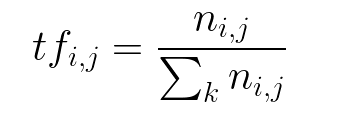
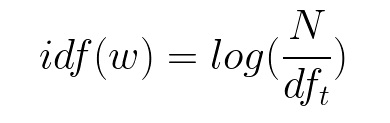
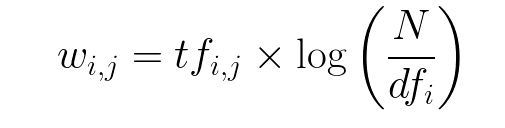

We compute the TF-IDF score for top 200 common meaningful words. The stopwords are the most frequent words, but are of very little significance. We drop all the stopwords and only get the TF-IDF score of meaningful words.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#train_x,test_x,train_y,test_y = train_test_split(reviews[['words_count','chars_count','words_length']],reviews['recommend'], test_size = 0.2)
tfidf = TfidfVectorizer(tokenizer=word_tokenize, token_pattern=None, max_features = 200, stop_words = stops)
tfidf.fit(reviews["review_clean"])
x_train_vector = tfidf.transform(list(train_x.review_clean))
x_test_vector = tfidf.transform(list(test_x.review_clean))

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [ ]:
print(tfidf.get_feature_names())

['_', 'air', 'airport', 'amazing', 'area', 'arrived', 'ask', 'asked', 'available', 'away', 'bad', 'bar', 'bathroom', 'beach', 'beautiful', 'bed', 'best', 'better', 'big', 'bit', 'block', 'booked', 'breakfast', 'buffet', 'building', 'bus', 'business', 'ca', 'came', 'car', 'check', 'choice', 'city', 'clean', 'close', 'club', 'coffee', 'come', 'comfortable', 'couple', 'day', 'definitely', 'desk', 'different', 'dinner', 'distance', 'door', 'drink', 'early', 'easy', 'eat', 'end', 'english', 'enjoyed', 'especially', 'evening', 'excellent', 'expensive', 'experience', 'extra', 'extremely', 'family', 'fantastic', 'far', 'feel', 'felt', 'fine', 'floor', 'food', 'free', 'friend', 'friendly', 'fun', 'getting', 'going', 'good', 'got', 'great', 'guest', 'hard', 'help', 'helpful', 'high', 'highly', 'home', 'hot', 'hour', 'huge', 'husband', 'internet', 'kid', 'know', 'la', 'large', 'left', 'like', 'little', 'lobby', 'located', 'location', 'long', 'look', 'looking', 'lot', 'loved', 'lovely', 'main', 'm

Combined tf-idf features and sentiment features. 

In [ ]:
feature_names = tfidf.get_feature_names()
dense = x_train_vector.todense()
denselist = dense.tolist()
dftrain = pd.DataFrame(denselist, columns=feature_names)
dftrain['pos'] = reviews['pos']
dftrain['neg'] = reviews['neg']
dftrain['neu'] = reviews['neu']
#dftrain['ave_wl'] = reviews['words_length']

feature_names = tfidf.get_feature_names()
dense = x_test_vector.todense()
denselist = dense.tolist()
dftest = pd.DataFrame(denselist, columns=feature_names)
dftest['pos'] = reviews['pos']
dftest['neg'] = reviews['neg']
dftest['neu'] = reviews['neu']
#dftest['ave_wl'] = reviews['words_length']


For the rating data is imbalanced, we use oversampling to get balanced train data.

In [ ]:
from imblearn.over_sampling import SMOTE

train_x_b, train_y_b = SMOTE().fit_resample(x_train_vector, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


#### Decision Tree

We first build a DT model using gini-based information gain and without max depth limitation. 
The accuracy is 0.4335.
The tree is shown below. Form the tree we can see this model is overfitting. 


Decision Tree
features: top 200 word tf-idf :
Accuracy:  0.43201040988939493
              precision    recall  f1-score   support

           1       0.33      0.34      0.33       407
           2       0.23      0.22      0.22       523
           3       0.19      0.20      0.19       642
           4       0.38      0.37      0.37      1875
           5       0.58      0.59      0.58      2701

    accuracy                           0.43      6148
   macro avg       0.34      0.34      0.34      6148
weighted avg       0.43      0.43      0.43      6148



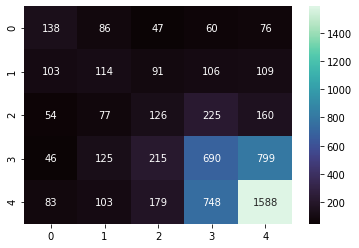

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train_vector, train_y)

dt_preds = dt_model.predict(x_test_vector)
evaluation('Decision Tree\nfeatures: top 200 word tf-idf', dt_preds, test_y)

[Text(286.37606472778606, 216.02805194805194, 'X[174] <= 0.041\ngini = 0.695\nsamples = 14343\nvalue = [997, 1288, 1526, 4210, 6322]'),
 Text(251.1977208363891, 213.20415584415585, 'X[196] <= 0.092\ngini = 0.673\nsamples = 13119\nvalue = [708, 1003, 1338, 3969, 6101]'),
 Text(213.95261102800617, 210.38025974025973, 'X[56] <= 0.123\ngini = 0.695\nsamples = 11404\nvalue = [691, 978, 1272, 3575, 4888]'),
 Text(169.69870300572697, 207.55636363636364, 'X[77] <= 0.051\ngini = 0.717\nsamples = 9543\nvalue = [672, 931, 1184, 3029, 3727]'),
 Text(112.58036821020079, 204.73246753246752, 'X[127] <= 0.072\ngini = 0.77\nsamples = 4626\nvalue = [566, 682, 674, 1221, 1483]'),
 Text(93.29959163674205, 201.90857142857143, 'X[75] <= 0.003\ngini = 0.78\nsamples = 4197\nvalue = [557, 670, 647, 1130, 1193]'),
 Text(68.48661384079986, 199.08467532467532, 'X[104] <= 0.029\ngini = 0.774\nsamples = 2227\nvalue = [434, 345, 262, 446, 740]'),
 Text(63.40804628616098, 196.26077922077923, 'X[38] <= 0.032\ngini = 0

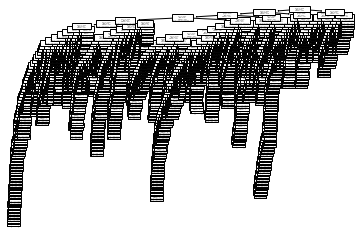

In [ ]:
from sklearn import tree
tree.plot_tree(dt_model)

We set the depth of the tree as 6 and 10.
Comparing with the DT without depth limitation, the model with depth of 6 and 10 result in a slightly higher accuracy, 0.4699 and 0.4789.

Decision Tree max_depth = 6
features: top 200 word tf-idf :
Accuracy:  0.4700715679895901
              precision    recall  f1-score   support

           1       0.17      0.38      0.23       186
           2       0.08      0.27      0.12       146
           3       0.01      0.27      0.01        15
           4       0.18      0.35      0.24       946
           5       0.90      0.50      0.65      4855

    accuracy                           0.47      6148
   macro avg       0.26      0.35      0.25      6148
weighted avg       0.74      0.47      0.56      6148



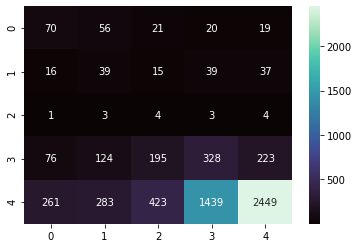

In [ ]:
dt_model6 = DecisionTreeClassifier(max_depth = 6)
dt_model6.fit(x_train_vector, train_y)
dt_preds6 = dt_model6.predict(x_test_vector)
evaluation('Decision Tree max_depth = 6\nfeatures: top 200 word tf-idf', dt_preds6, test_y)

[Text(176.04669421487603, 201.90857142857143, 'X[174] <= 0.041\ngini = 0.695\nsamples = 14343\nvalue = [997, 1288, 1526, 4210, 6322]'),
 Text(88.54214876033058, 170.84571428571428, 'X[196] <= 0.092\ngini = 0.673\nsamples = 13119\nvalue = [708, 1003, 1338, 3969, 6101]'),
 Text(44.27107438016529, 139.78285714285715, 'X[56] <= 0.123\ngini = 0.695\nsamples = 11404\nvalue = [691, 978, 1272, 3575, 4888]'),
 Text(22.135537190082644, 108.72, 'X[77] <= 0.051\ngini = 0.717\nsamples = 9543\nvalue = [672, 931, 1184, 3029, 3727]'),
 Text(11.067768595041322, 77.65714285714284, 'X[127] <= 0.072\ngini = 0.77\nsamples = 4626\nvalue = [566, 682, 674, 1221, 1483]'),
 Text(5.533884297520661, 46.59428571428572, 'X[75] <= 0.003\ngini = 0.78\nsamples = 4197\nvalue = [557, 670, 647, 1130, 1193]'),
 Text(2.7669421487603305, 15.531428571428563, 'gini = 0.774\nsamples = 2227\nvalue = [434, 345, 262, 446, 740]'),
 Text(8.300826446280992, 15.531428571428563, 'gini = 0.757\nsamples = 1970\nvalue = [123, 325, 385, 6

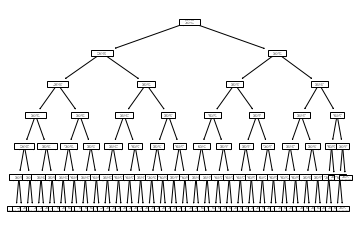

In [ ]:
tree.plot_tree(dt_model6)

Decision Tree max_depth = 10
features: top 200 word tf-idf :
Accuracy:  0.47706571242680545
              precision    recall  f1-score   support

           1       0.52      0.30      0.38       742
           2       0.10      0.28      0.14       172
           3       0.03      0.19      0.05        95
           4       0.40      0.37      0.38      1957
           5       0.70      0.60      0.65      3182

    accuracy                           0.48      6148
   macro avg       0.35      0.35      0.32      6148
weighted avg       0.56      0.48      0.51      6148



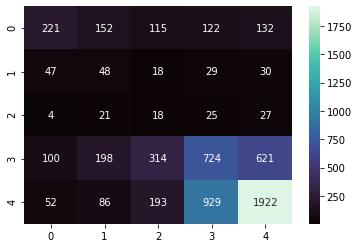

In [ ]:
dt_model10 = DecisionTreeClassifier(max_depth = 10)
dt_model10.fit(x_train_vector, train_y)
dt_preds10 = dt_model10.predict(x_test_vector)
evaluation('Decision Tree max_depth = 10\nfeatures: top 200 word tf-idf',dt_preds10, test_y)

[Text(220.64889374999998, 207.55636363636364, 'X[174] <= 0.041\ngini = 0.695\nsamples = 14343\nvalue = [997, 1288, 1526, 4210, 6322]'),
 Text(150.73846874999998, 187.7890909090909, 'X[196] <= 0.092\ngini = 0.673\nsamples = 13119\nvalue = [708, 1003, 1338, 3969, 6101]'),
 Text(100.6074, 168.0218181818182, 'X[56] <= 0.123\ngini = 0.695\nsamples = 11404\nvalue = [691, 978, 1272, 3575, 4888]'),
 Text(62.2728, 148.25454545454545, 'X[77] <= 0.051\ngini = 0.717\nsamples = 9543\nvalue = [672, 931, 1184, 3029, 3727]'),
 Text(35.9073, 128.48727272727274, 'X[127] <= 0.072\ngini = 0.77\nsamples = 4626\nvalue = [566, 682, 674, 1221, 1483]'),
 Text(18.9162, 108.72, 'X[75] <= 0.003\ngini = 0.78\nsamples = 4197\nvalue = [557, 670, 647, 1130, 1193]'),
 Text(10.2114, 88.95272727272729, 'X[104] <= 0.029\ngini = 0.774\nsamples = 2227\nvalue = [434, 345, 262, 446, 740]'),
 Text(5.3568, 69.18545454545455, 'X[38] <= 0.032\ngini = 0.783\nsamples = 2048\nvalue = [432, 342, 258, 396, 620]'),
 Text(2.6784, 49.41

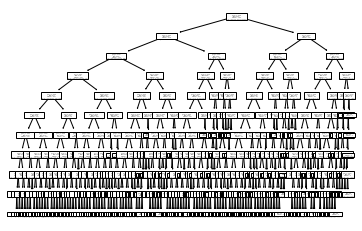

In [ ]:
tree.plot_tree(dt_model10)

We try to use the sentiment data and tf-idf data to train the DT model with max depth of 10. The tree results in slightly lower classification accuracy, 0.4770.   

Decision Tree max_depth = 10
features: top 200 word tf-idf & sentiment :
Accuracy:  0.47608978529603124
              precision    recall  f1-score   support

           1       0.52      0.30      0.38       741
           2       0.10      0.27      0.14       175
           3       0.02      0.16      0.04        89
           4       0.40      0.37      0.38      1962
           5       0.70      0.60      0.65      3181

    accuracy                           0.48      6148
   macro avg       0.35      0.34      0.32      6148
weighted avg       0.56      0.48      0.51      6148



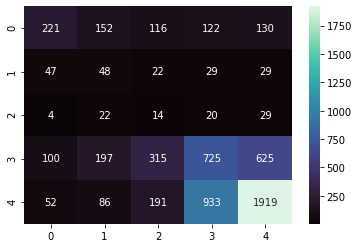

In [ ]:
dt_model = DecisionTreeClassifier(max_depth = 10)
dt_model.fit(dftrain, train_y)
dt_preds = dt_model.predict(dftest)
evaluation('Decision Tree max_depth = 10\nfeatures: top 200 word tf-idf & sentiment',dt_preds, test_y)

#### Naive Bayes
The Naive Bayes model has a better performance than DT. The accuracy is 0.5223. 

Naive Bayes
features: top 200 word tf-idf :
Accuracy:  0.5222836694860117
              precision    recall  f1-score   support

           1       0.65      0.47      0.54       589
           2       0.36      0.23      0.28       813
           3       0.38      0.29      0.33       856
           4       0.44      0.49      0.46      1643
           5       0.62      0.76      0.68      2247

    accuracy                           0.52      6148
   macro avg       0.49      0.45      0.46      6148
weighted avg       0.51      0.52      0.51      6148



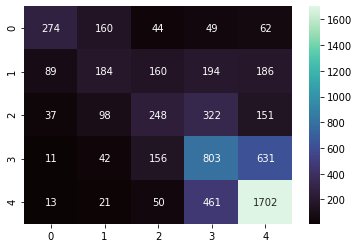

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(train_x_b.toarray(), train_y_b)
nb_preds = nb_model.predict(x_test_vector.toarray())
evaluation('Naive Bayes\nfeatures: top 200 word tf-idf',nb_preds, test_y)

Naive Bayes
 features: word tf-idf & sentiment :
Accuracy:  0.5058555627846454
              precision    recall  f1-score   support

           1       0.14      0.66      0.24        92
           2       0.07      0.41      0.12        82
           3       0.01      0.78      0.02         9
           4       0.21      0.44      0.28       857
           5       0.96      0.52      0.67      5108

    accuracy                           0.51      6148
   macro avg       0.28      0.56      0.27      6148
weighted avg       0.83      0.51      0.60      6148



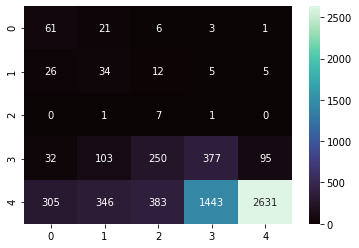

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(dftrain, train_y)
nb_preds = nb_model.predict(dftest)
evaluation('Naive Bayes\nfeatures: top 200 word tf-idf & sentiment',nb_preds, test_y)

#### SVC
The SVC model has a better performance than DT and NB. 

SVC
features: top 200 word tf-idf :
Accuracy:  0.5801886792452831
              precision    recall  f1-score   support

           1       0.52      0.58      0.55       383
           2       0.32      0.34      0.33       480
           3       0.14      0.43      0.21       212
           4       0.48      0.50      0.49      1762
           5       0.81      0.67      0.73      3311

    accuracy                           0.58      6148
   macro avg       0.45      0.50      0.46      6148
weighted avg       0.64      0.58      0.60      6148



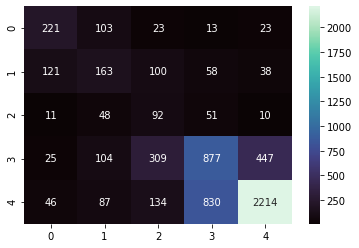

In [ ]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(x_train_vector, train_y)
svc_preds = svc_model.predict(x_test_vector)
evaluation('SVC\nfeatures: top 200 word tf-idf', svc_preds, test_y)

The accuracy of SVC with linear kernel is 0.5804.


SVC
features: top 200 word tf-idf :
Accuracy:  0.5803513337670787
              precision    recall  f1-score   support

           1       0.59      0.56      0.58       442
           2       0.33      0.35      0.34       479
           3       0.14      0.43      0.21       215
           4       0.48      0.49      0.49      1800
           5       0.80      0.68      0.73      3212

    accuracy                           0.58      6148
   macro avg       0.47      0.50      0.47      6148
weighted avg       0.63      0.58      0.60      6148



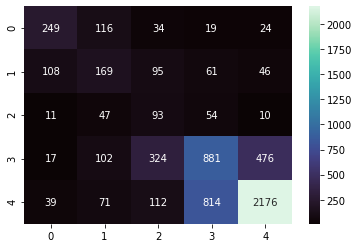

In [ ]:
from sklearn.svm import SVC
svc_model = SVC(kernel = 'linear')
svc_model.fit(x_train_vector, train_y)
svc_preds = svc_model.predict(x_test_vector)
evaluation('SVC\nfeatures: top 200 word tf-idf', svc_preds, test_y)

SVC
features: top 200 word tf-idf & sentiment :
Accuracy:  0.5816525699414443
              precision    recall  f1-score   support

           1       0.54      0.58      0.56       396
           2       0.34      0.36      0.35       477
           3       0.13      0.46      0.21       193
           4       0.48      0.49      0.49      1786
           5       0.81      0.67      0.73      3296

    accuracy                           0.58      6148
   macro avg       0.46      0.51      0.47      6148
weighted avg       0.64      0.58      0.60      6148



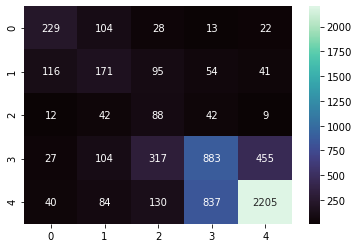

In [ ]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(dftrain, train_y)
svc_preds = svc_model.predict(dftest)
evaluation('SVC\nfeatures: top 200 word tf-idf & sentiment', svc_preds, test_y)

### Further try: LSTM

Build the model

In [ ]:
import tensorflow as tf
import random
import sys
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.utils import np_utils
from keras import optimizers
import keras
from keras import layers
import tensorflow as tf

To learn the charcter sequence of the reviews, we use Long short-term memory model. 
We build the LSTM model using all the 5 star reviews (9045 reviews in total).
 


In [ ]:
df = reviews[reviews['Rating'] == 5]
df = df.replace({r'\+': ''}, regex=True)
df2 = df
len(df2)
#shuffle the order of the reviews
short_reviews=df2.sample(frac=1).reset_index(drop=True)
text = ' '.join(short_reviews.Review)
print('Corpus length:', len(text))
filename='/content/sample_data/short_reviews_shuffle.txt'
#short_reviews.to_csv(filename, header=None, index=None, sep=' ')
with open(filename, 'w', encoding="utf8") as f:
  f.write(text)
  f.flush()
chars = sorted(list(set(text)))
print('Unique characters:', len(chars))
# Dictionary mapping unique characters to their index in `chars`
char_indices = dict((char, chars.index(char)) for char in chars)

maxlen=60
step=1

Corpus length: 5999860
Unique characters: 90


In [ ]:
#Get Data From Chunk is necessary to process large data sets like the one we have
#
def getDataFromChunk(txtChunk, maxlen=60, step=1):
    sentences = []
    next_chars = []
    for i in range(0, len(txtChunk) - maxlen, step):
        sentences.append(txtChunk[i : i + maxlen]) # each sentence contain 60 characters
        next_chars.append(txtChunk[i + maxlen])
    print('nb sequences:', len(sentences))
    print('Vectorization...')
    X = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
    y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
    for i, sentence in enumerate(sentences):
        #print(i, sentence)
        for t, char in enumerate(sentence):
            #print(t, char)
            X[i, t, char_indices[char]] = 1
            y[i, char_indices[next_chars[i]]] = 1
    return [X, y]

In [ ]:
# model with 2 layers of lstm and 0.2 dropout
model = keras.models.Sequential()
model.add(layers.LSTM(1024, input_shape=(maxlen, len(chars)),return_sequences=True))
model.add(Dropout(0.2))
model.add(layers.LSTM(1024, input_shape=(maxlen, len(chars))))
model.add(Dropout(0.2))
model.add(layers.Dense(len(chars), activation='softmax'))
# model.load_weights("/content/sample_data/LSTM/lstm.hdf5")
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 1024)          4567040   
_________________________________________________________________
dropout (Dropout)            (None, 60, 1024)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1024)              8392704   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 90)                92250     
Total params: 13,051,994
Trainable params: 13,051,994
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

In [ ]:
# save the weight if the loss improved
filepath="lstm.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.5,
              patience=1, min_lr=0.00001)
callbacks_list = [checkpoint, reduce_lr]

In [ ]:
def sample(preds, temperature=1.0):
    '''
    Generate the review given the model predicted character probability
    If the temperature
    is very small, it will always pick the index
    with highest pred value
    '''
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

If we use CPU to train the model, it will takes more than 2 days per epoch. If we use GPU to train the model, it takes about 5 days to finish 20 epochs.

In [ ]:
with open("/content/sample_data/short_reviews_shuffle.txt", 'r', encoding="utf8") as f:
  for chunk in iter(lambda: f.read(90000), ""):
    X, y = getDataFromChunk(chunk)
    model.fit(X, y, batch_size=256, epochs=20, callbacks=callbacks_list)    
    # Select a text seed at random
  start_index = random.randint(0, len(text) - maxlen - 1)
  generated_text = text[start_index: start_index + maxlen]

for temperature in [0.5, 0.8, 1.0]:
  print('------ temperature:', temperature)
  sys.stdout.write(generated_text)
  # We generate 300 characters
  for i in range(300):
    sampled = np.zeros((1, maxlen, len(chars)))
    for t, char in enumerate(generated_text):
      sampled[0, t, char_indices[char]] = 1.

      preds = model.predict(sampled, verbose=0)[0]
      next_index = sample(preds, temperature)
      next_char = chars[next_index]

      generated_text += next_char
      generated_text = generated_text[1:]

      sys.stdout.write(next_char)
      sys.stdout.flush()
  print()

### YAKE + brown clustering

**Why choosing Yake + BrownClustering?**

Yake is a keyword extractor which not rely on dictionaries nor thesauri, neither is trained against any corpora. Instead, it follows an unsupervised approach which builds upon features extracted from the text, making it thus applicable to documents written in different languages without the need for further knowledge. Thus Yake is a good tools which could help to reduce the demenssion.

**Objective**: we want to find what are the frequent complains in low rating reviews, and things that people are most satisfied when giving high ratings.

**Steps:**
1. Take the review corpus by rating
2. Using YAKE extract keywords from each review. Get the output of the keyword and its’ weight.  
3. Using a list of tokenized keywords got from YAKE as input of BrownClustering, and find the most related words of a specific term. 

  E.g. If we want to know in rating 1, what do people say about “service”.We need to input term "service", and the model will return the most words which related to "services"..


In [ ]:
pip install git+https://github.com/LIAAD/yake

  Cloning https://github.com/LIAAD/yake to /tmp/pip-req-build-vpmsqm9g
  Running command git clone -q https://github.com/LIAAD/yake /tmp/pip-req-build-vpmsqm9g
     |████████████████████████████████| 102kB 5.6MB/s 
  Created wheel for yake: filename=yake-0.4.3-py2.py3-none-any.whl size=66280 sha256=3aa5f9032e46b242c94557bd516e46e5e0a0346706969080a05f6c01a9ac3b66
  Stored in directory: /tmp/pip-ephem-wheel-cache-hsskfb61/wheels/be/35/27/e4ebd54b78c1806ed8b0271ce247fcd91e2bedde35889fbc9b
  Created wheel for segtok: filename=segtok-1.5.10-cp36-none-any.whl size=25020 sha256=f70d3d23bf435ce4a7c65c69b4b9e379706c01fed11bda18fad032b2005001d7
  Stored in directory: /root/.cache/pip/wheels/b4/39/f6/9ca1c5cabde964d728023b5751c3a206a5c8cc40252321fb6b
Successfully built yake segtok


In [ ]:
import yake
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import collections
from nltk.stem import WordNetLemmatizer
from brown_clustering_yanyuan import *
from nltk.tokenize import RegexpTokenizer

In [ ]:
def keywords_yake(sample_posts):
    # take keywords for each post & turn them into a text string "sentence"
    #by default, the extractor will return the top 15 important keywords, with 3-grams
    simple_kwextractor = yake.KeywordExtractor(top = 15, n=4)

    # create empty list to save our "sentnecs" to
    sentences = []

    for post in sample_posts:
        post_keywords = simple_kwextractor.extract_keywords(post)

        sentence_output = ""
        for word, number in post_keywords:
            sentence_output += word + " "

        sentences.append(sentence_output)
        
    return(sentences)

def tokenizing_after_YAKE(sentences):
    tokenizer = RegexpTokenizer(r'\w+')
    sample_data_tokenized = [w.lower() for w in sentences]
    sample_data_tokenized = [tokenizer.tokenize(i) for i in sample_data_tokenized]
    
    return(sample_data_tokenized)

def lemma_after_YAKE(sample_data_tokenized):#word list
    lemmatizer = WordNetLemmatizer() # NLTK
    sample_data_lemmatized = [lemmatizer.lemmatize(x) for x in sample_data_tokenized]
    
    return(sample_data_lemmatized)

def train_brown_cluster(tokenized_output,clusters):
    '''
    tokenized_output = list of tokenized review sentences
    clusters = number of clusters
    '''
    # cluster
    corpus = Corpus(tokenized_output, 0.001)
    clustering = BrownClustering(corpus,clusters)# (corpus,number of clusters)
    train_output = clustering.train()
    return clustering

def get_similar(clustering,word_str,cap):
    '''
    word_str = the object you want to find[] related terms
    cap = number of similar terms
    '''
    
    # given the top ? similar terms
    terms_output = clustering.get_similar(word_str,cap)
    return terms_output

In [ ]:
# yake keywords extraction, get tokenized list

# take 100 rating 1 reviews
sample_reviews = reviews[reviews['Rating']==1]['Review'][:100]
keyword_output = keywords_yake(sample_reviews)
tokenized_output = tokenizing_after_YAKE(keyword_output)

In [ ]:
# clustering by 5 groups
clustering1 = train_brown_cluster(tokenized_output,5)

1	2020-12-15 02:49:29.744318
(1, 5)
2	2020-12-15 02:49:29.746509
(1, 5)
3	2020-12-15 02:49:29.748648
(2, 5)
4	2020-12-15 02:49:29.750618
(0, 3)
5	2020-12-15 02:49:29.752543
(0, 5)
6	2020-12-15 02:49:29.754021
(4, 5)
7	2020-12-15 02:49:29.755780
(0, 5)
8	2020-12-15 02:49:29.757271
(0, 5)
9	2020-12-15 02:49:29.758841
(1, 5)
10	2020-12-15 02:49:29.761670
(3, 5)
11	2020-12-15 02:49:29.764493
(1, 5)
12	2020-12-15 02:49:29.766426
(1, 5)
13	2020-12-15 02:49:29.768087
(2, 4)
14	2020-12-15 02:49:29.770056
(1, 5)
15	2020-12-15 02:49:29.772126
(1, 5)
16	2020-12-15 02:49:29.773663
(0, 3)
17	2020-12-15 02:49:29.775762
(0, 5)
18	2020-12-15 02:49:29.778885
(1, 5)
19	2020-12-15 02:49:29.780574
(2, 5)
20	2020-12-15 02:49:29.782852
(0, 5)
21	2020-12-15 02:49:29.784361
(0, 5)
22	2020-12-15 02:49:29.786522
(1, 5)
23	2020-12-15 02:49:29.788974
(2, 5)
24	2020-12-15 02:49:29.790664
(3, 4)
25	2020-12-15 02:49:29.792570
(1, 5)
26	2020-12-15 02:49:29.794650
(3, 5)
27	2020-12-15 02:49:29.796221
(1, 5)
28	2020-12

In [ ]:
# get the most 20 similar words related to 'good' in rating 1 reviews 
similar_rating1 = get_similar(clustering1,'good',20)
similar_rating1

[('late', 854),
 ('door', 854),
 ('morning', 854),
 ('bed', 854),
 ('floor', 854),
 ('window', 854),
 ('car', 854),
 ('parking', 854),
 ('air', 854),
 ('stay', 854),
 ('trip', 854),
 ('rooms', 854),
 ('night', 854),
 ('shower', 854),
 ('bathroom', 854),
 ('the', 854),
 ('room', 854),
 ('terrible', 854),
 ('sink', 854),
 ('reservation', 854)]

**Conclusion:**

1. Yake + BrownClustering is fast.
2. Yake is a good keywords etracting tools for processing short content, and robust with stop words and punctuation.
3. Combine the data cleaning and feature engineering, and saving a lot of time for data processing.
4. However, as the clusters only make up by some single words, instead of word pairs. So we only have comparatively vague understanding of our corpus. 


